Text(0.5, 1.0, '6param Mean data comparison')

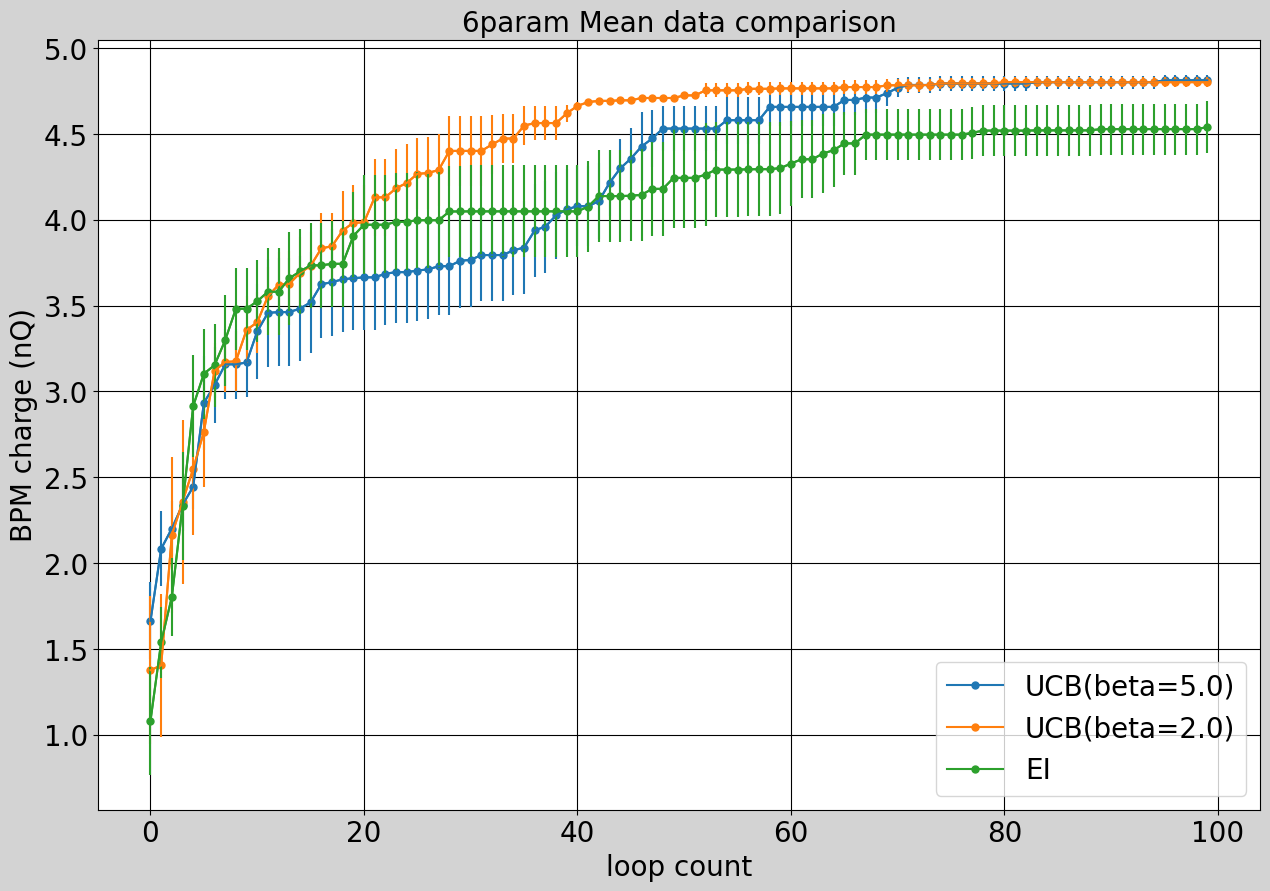

In [9]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

files1 = ["log_2023_06_14_18_20_30.csv", "log_2023_06_14_18_33_53.csv", "log_2023_06_14_18_44_43.csv", "log_2023_06_14_18_54_49.csv","log_2023_06_14_19_04_44.csv"]
files2 = ["log_2023_06_14_19_18_41.csv", "log_2023_06_14_19_29_47.csv", "log_2023_06_14_19_40_25.csv", "log_2023_06_14_19_51_21.csv","log_2023_06_14_20_01_47.csv"]
files3 = ["log_2023_06_14_20_13_57.csv", "log_2023_06_14_20_31_05.csv", "log_2023_06_14_20_39_06.csv", "log_2023_06_14_20_53_50.csv","log_2023_06_14_21_02_06.csv"]

file = [files1, files2, files3]

df = [[0, 0, 0, 0, 0], 
      [0, 0, 0, 0, 0], 
      [0, 0, 0, 0, 0]]

sum = [[0]*100]*3
mean = [[0]*100]*3
sum_minus_mean = [[0]*100]*3
error = [[0]*100]*3

fig_ave,ax_ave = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')

for j in range(3):
    for i in range(5):
        df[j][i] = pd.read_csv(file[j][i], 
        names = ["n","y","x0","x1","x2","x3","x4","x5","ymax","x0max","x1max","x2max","x3max","x4max","x5max"],
        encoding="SHIFT-JIS")
        
        sum[j] = sum[j] + df[j][i]["ymax"]
        
    mean[j] = sum[j]/(i+1)
    
    for k in range(5):
        
        sum_minus_mean[j] = sum_minus_mean[j] + (df[j][k]["ymax"] - mean[j])**2
        
    error[j] = ((sum_minus_mean[j])**(0.5))/(k+1)


plt.plot(df[0][0]["n"],mean[0], marker = "." , markersize = 10 , label = "UCB(beta=5.0)")
plt.errorbar(df[0][0]["n"],mean[0], yerr=error[0],color='C0')
plt.plot(df[0][0]["n"],mean[1], marker = "." , markersize = 10 , label = "UCB(beta=2.0)")
plt.errorbar(df[0][0]["n"],mean[1], yerr=error[1],color='C1')
plt.plot(df[0][0]["n"],mean[2], marker = "." , markersize = 10 , label = "EI")
plt.errorbar(df[0][0]["n"],mean[2], yerr=error[2],color='C2')



ax_ave.grid(which = "major" , color = "black" , linestyle = "-")
ax_ave.set_xlabel("loop count",fontsize = 20)
ax_ave.set_ylabel("BPM charge (nQ)",fontsize = 20)
ax_ave.legend()
ax_ave.set_title('6param Mean data comparison',fontsize = 20)

    

22.858014583587646


Text(0.5, 1.0, 'Empirical distribution function mean comparison')

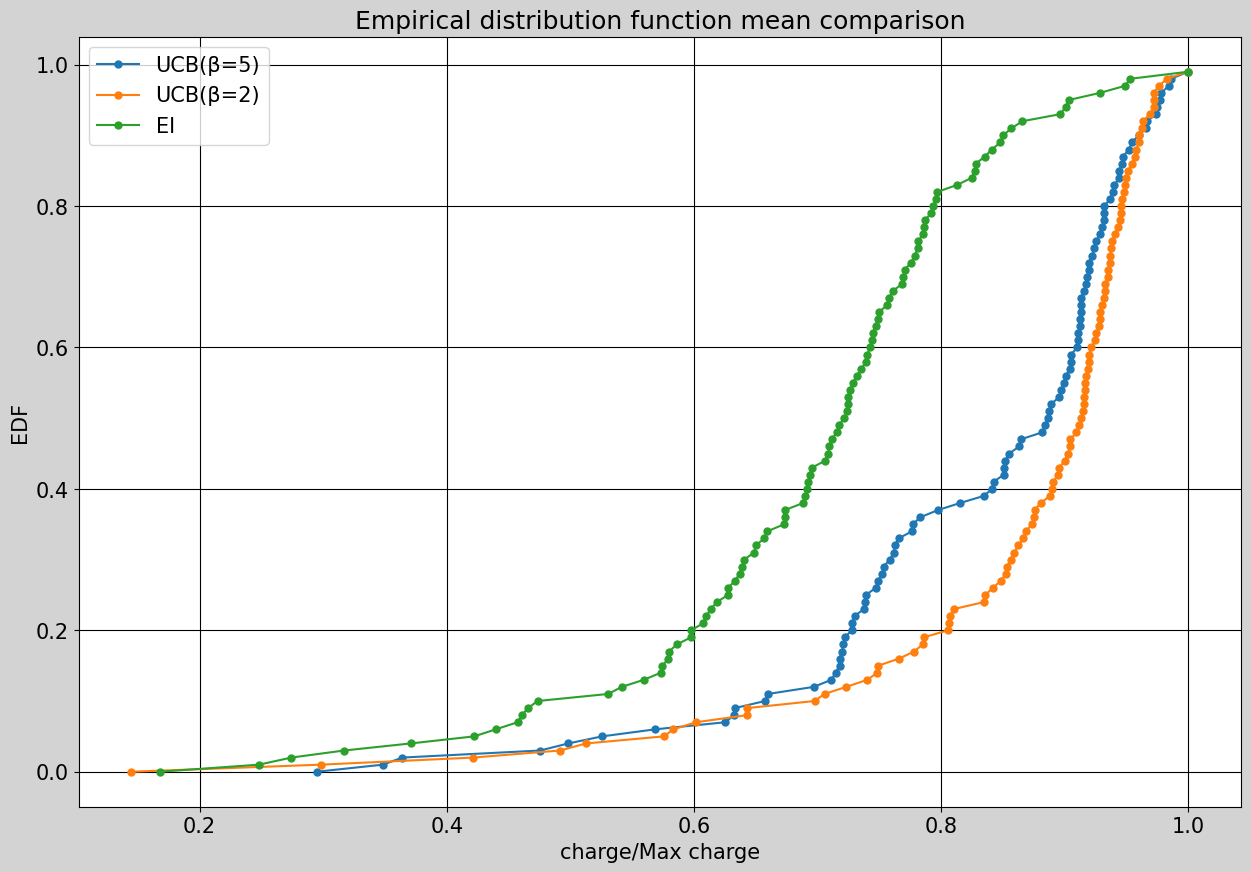

In [2]:
fig_e,ax_e = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')

numbers = [i/100 for i in range(0, 100)]

sum_e = [[0]*100]*3
sum_e_sort = [[0]*100]*3
sum_max_e = [[0]*100]*3

for k in range (3):
    for s in range (5):
        c = df[k][s]["y"]
        c_sort = np.sort(df[k][s]["y"])
        sum_e[k] = sum_e[k] + c
        sum_e_sort[k] = sum_e_sort[k] + c_sort
        d = df[k][s]["ymax"][99]
        sum_max_e[k] = sum_max_e[k] + d
    
print(np.sort((sum_e[0]))[99])
    
plt.plot(np.sort(sum_e[0])/np.sort(sum_e[0])[99],numbers, marker = "." , markersize = 10 , label = "UCB(β=5)")
plt.plot(np.sort(sum_e[1])/np.sort(sum_e[1])[99],numbers, marker = "." , markersize = 10 , label = "UCB(β=2)")
plt.plot(np.sort(sum_e[2])/np.sort(sum_e[2])[99],numbers, marker = "." , markersize = 10 , label = "EI")

ax_e.grid(which = "major" , color = "black" , linestyle = "-")
ax_e.set_xlabel("charge/Max charge")
ax_e.set_ylabel("EDF")
ax_e.legend()
ax_e.set_title('Empirical distribution function mean comparison')

Text(0.5, 1.0, 'Empirical distribution function mean comparison')

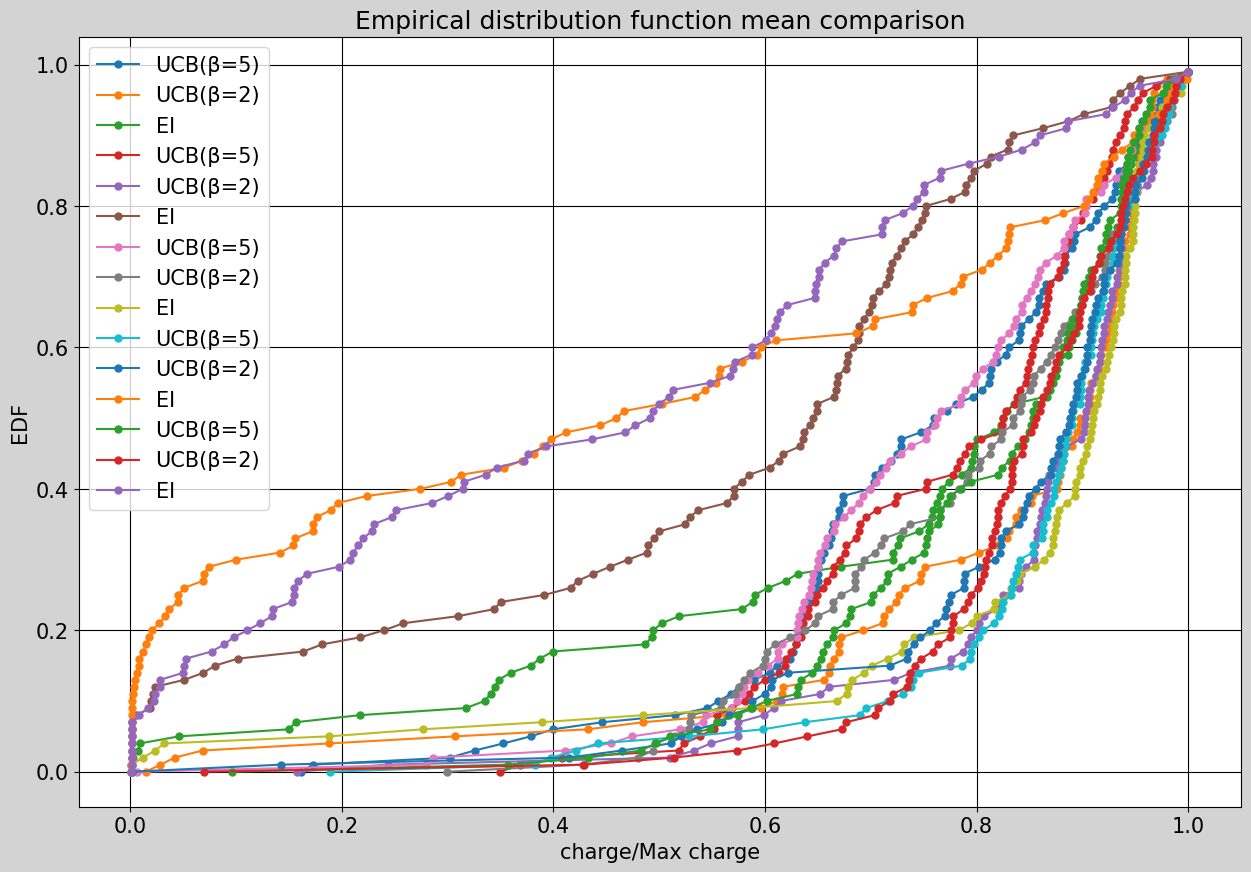

In [3]:
fig_e,ax_e = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')



sum_e = [[0]*100]*3
sum_max_e = [[0]*100]*3

for k in range (3):
    for s in range (5):
        c = np.sort(df[k][s]["y"])
        sum_e[k] = sum_e[k] + c
        d = df[k][s]["ymax"][99]
        sum_max_e[k] = sum_max_e[k] + d
    
for s in range (5):
    
    plt.plot(np.sort(df[0][s]["y"])/df[0][s]["ymax"][99],numbers, marker = "." , markersize = 10 , label = "UCB(β=5)")
    plt.plot(np.sort(df[1][s]["y"])/df[1][s]["ymax"][99],numbers, marker = "." , markersize = 10 , label = "UCB(β=2)")
    plt.plot(np.sort(df[2][s]["y"])/df[2][s]["ymax"][99],numbers, marker = "." , markersize = 10 , label = "EI")

ax_e.grid(which = "major" , color = "black" , linestyle = "-")
ax_e.set_xlabel("charge/Max charge")
ax_e.set_ylabel("EDF")
ax_e.legend()
ax_e.set_title('Empirical distribution function mean comparison')